In [19]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
def simulation_simple_model_homoskedasticity_high_r_squared(times):

    mses_regression = []

    mses_knns = {}
    ks = [2, 3, 5, 10, 20, 30]
    for k in ks:
        mses_knns[k] = []

    for run in range(times):
        # true DGP is: y = b0 + b1 * X + e, X ~ t(5), e ~ N(0, 1)
        # sample size: 1000
        sample_size = 1000

        b0 = 3
        b1 = 7
        # X = np.reshape(stats.norm.rvs(loc=10, scale=5, size=sample_size), (sample_size, 1))
        X = np.reshape(stats.t.rvs(5, size=sample_size), (sample_size, 1))
        e = np.reshape(stats.norm.rvs(loc=0, scale=1, size=sample_size), (sample_size, 1))
        Y = b0 + b1 * X + e

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

        # Linear regression model
        linear_reg_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
        mses_regression.append(np.mean(np.square(linear_reg_model.predict(sm.add_constant(X_test)) - np.reshape(Y_test, (1, int(sample_size * 0.1))))))

        # KNN with K = k
        for k in ks:
            neighbours_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, Y_train)
            mses_knns[k].append(np.mean(np.square(neighbours_model.predict(X_test) - Y_test)))


    return np.mean(mses_regression), { key: np.mean(mses) for key, mses in mses_knns.items() }

In [21]:
def simulation_simple_model_homoskedasticity_low_r_squared(times):

    mses_regression = []

    mses_knns = {}
    ks = [2, 3, 5, 10, 20, 30]
    for k in ks:
        mses_knns[k] = []

    for run in range(times):
        # true DGP is: y = b0 + b1 * X + e, X ~ t(5), e ~ N(0, 10)
        sample_size = 1000

        b0 = 3
        b1 = 7
        X = np.reshape(stats.t.rvs(5, size=sample_size), (sample_size, 1))
        e = np.reshape(stats.norm.rvs(loc=0, scale=10, size=sample_size), (sample_size, 1))
        Y = b0 + b1 * X + e

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

        # Linear regression model
        linear_reg_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
        mses_regression.append(np.mean(np.square(linear_reg_model.predict(sm.add_constant(X_test)) - np.reshape(Y_test, (1, int(sample_size * 0.1))))))

        # KNN with K = k
        for k in ks:
            neighbours_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, Y_train)
            mses_knns[k].append(np.mean(np.square(neighbours_model.predict(X_test) - Y_test)))


    return np.mean(mses_regression), { key: np.mean(mses) for key, mses in mses_knns.items() }

In [22]:
def simulation_simple_model_heteroskedasticity_high_r_squared(times):

    mses_regression = []
    mses_knns = {}
    ks = [2, 3, 5, 10, 20, 30]
    for k in ks:
        mses_knns[k] = []

    for run in range(times):
        # true DGP is: y = b0 + b1 * X + e, X ~ t(5) with std = 5, e ~ N(0, |X * 3|)
        sample_size = 1000

        b0 = 3
        b1 = 7
        X = np.reshape(stats.t.rvs(5, size=sample_size) * 5 / np.sqrt(5 / 3), (sample_size, 1))

        e = np.zeros(sample_size)
        for i in range(sample_size):
            e[i] = stats.norm.rvs(loc=0, scale=abs(X[i] * 3), size=1)[0]
        e = np.reshape(e, (sample_size, 1))

        Y = b0 + b1 * X + e

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

        # Linear regression model
        linear_reg_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
        mses_regression.append(np.mean(np.square(linear_reg_model.predict(sm.add_constant(X_test)) - np.reshape(Y_test, (1, int(sample_size * 0.1))))))

        # KNN with K = k
        for k in ks:
            neighbours_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, Y_train)
            mses_knns[k].append(np.mean(np.square(neighbours_model.predict(X_test) - Y_test)))


    return np.mean(mses_regression), { key: np.mean(mses) for key, mses in mses_knns.items() }

In [23]:
def simulation_simple_model_heteroskedasticity_low_r_squared(times):

    mses_regression = []
    mses_knns = {}
    ks = [2, 3, 5, 10, 20, 30]
    for k in ks:
        mses_knns[k] = []

    for run in range(times):
        # true DGP is: y = b0 + b1 * X + e, X ~ t(5) with std = 5, e ~ N(0, 10 * |X * 3|)
        sample_size = 1000

        b0 = 3
        b1 = 7
        X = np.reshape(stats.t.rvs(5, size=sample_size) * 5 / np.sqrt(5 / 3), (sample_size, 1))

        e = np.zeros(sample_size)
        for i in range(sample_size):
            e[i] = stats.norm.rvs(loc=0, scale=10 * abs(X[i] * 3), size=1)[0]
        e = np.reshape(e, (sample_size, 1))

        Y = b0 + b1 * X + e

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

        # Linear regression model
        linear_reg_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
        mses_regression.append(np.mean(np.square(linear_reg_model.predict(sm.add_constant(X_test)) - np.reshape(Y_test, (1, int(sample_size * 0.1))))))

        # KNN with K = k
        for k in ks:
            neighbours_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, Y_train)
            mses_knns[k].append(np.mean(np.square(neighbours_model.predict(X_test) - Y_test)))


    return np.mean(mses_regression), { key: np.mean(mses) for key, mses in mses_knns.items() }

In [24]:
def simulation_multiple_model_homoskedasticity_high_r_squared(times):

    mses_regression = []

    mses_knns = {}
    ks = [2, 3, 5, 10, 20, 30]
    for k in ks:
        mses_knns[k] = []

    for run in range(times):
        # true DGP is: y = b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + e
        # X1 ~ t(5), X2 ~ N(0, 3), X3 ~ N(0, 6), X4 ~ t(3) with std = 5, e ~ N(0, 4)
        sample_size = 1000

        b0 = 3
        b1 = 7
        b2 = -4
        b3 = 5
        b4 = -1

        X1 = stats.t.rvs(5, size=sample_size)
        X2 = stats.norm.rvs(loc=0, scale=3, size=sample_size)
        X3 = stats.norm.rvs(loc=0, scale=6, size=sample_size)
        X4 = stats.t.rvs(3, size=sample_size) * 5 / np.sqrt(3 / 1)
        X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})

        e = stats.norm.rvs(loc=0, scale=1, size=sample_size)
        Y = b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + e

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

        # Linear regression model
        linear_reg_model = linear_model.LinearRegression().fit(X_train, Y_train.reshape(int(sample_size * 0.9), 1))
        mses_regression.append(np.mean(np.square(linear_reg_model.predict(X_test) - np.reshape(Y_test, (int(sample_size * 0.1), 1)))))

        # KNN with K = k
        for k in ks:
            neighbours_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, Y_train)
            mses_knns[k].append(np.mean(np.square(neighbours_model.predict(X_test) - Y_test)))


    return np.mean(mses_regression), { key: np.mean(mses) for key, mses in mses_knns.items() }

In [25]:
def simulation_multiple_model_heteroskedasticity_low_r_squared(times):

    mses_regression = []

    mses_knns = {}
    ks = [2, 3, 5, 10, 20, 30]
    for k in ks:
        mses_knns[k] = []

    for run in range(times):
        # true DGP is: y = b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + e
        # X1 ~ t(5), X2 ~ N(0, 3), X3 ~ N(0, 6), X4 ~ t(3) with std = 5, e ~ N(0, 15 * |X3|)
        sample_size = 1000

        b0 = 3
        b1 = 7
        b2 = -4
        b3 = 5
        b4 = -1

        X1 = stats.t.rvs(5, size=sample_size)
        X2 = stats.norm.rvs(loc=0, scale=3, size=sample_size)
        X3 = stats.norm.rvs(loc=0, scale=6, size=sample_size)
        X4 = stats.t.rvs(3, size=sample_size) * 5 / np.sqrt(3 / 1)
        X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})

        e = np.zeros(sample_size)
        for i in range(sample_size):
            e[i] = stats.norm.rvs(loc=0, scale=15 * abs(X3[i]), size=1)[0]

        Y = b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + e

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

        # Linear regression model
        linear_reg_model = linear_model.LinearRegression().fit(X_train, Y_train.reshape(int(sample_size * 0.9), 1))
        mses_regression.append(np.mean(np.square(linear_reg_model.predict(X_test) - np.reshape(Y_test, (int(sample_size * 0.1), 1)))))

        # KNN with K = k
        for k in ks:
            neighbours_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, Y_train)
            mses_knns[k].append(np.mean(np.square(neighbours_model.predict(X_test) - Y_test)))


    return np.mean(mses_regression), { key: np.mean(mses) for key, mses in mses_knns.items() }


In [26]:
def summarize(title, linear_mse, knns_mses):
    print(title)
    print(linear_mse)
    print(knns_mses)

    fig, ax = plt.subplots()

    ax.axhline(y=linear_mse, color='r', linestyle='--')

    x, y = zip(*knns_mses.items())
    ax.plot(x, y, color='b')

    ax.set_xlabel('parameter K in KNN')
    ax.set_ylabel('MSE')
    ax.legend(['Linear model MSE', 'KNN MSE'])

    ax.set_title(title)

    plt.show()

Simple model homoskedastic, low noise
1.0018502870001516
{2: 2.8224204279328795, 3: 2.796845729651619, 5: 2.9490664157304147, 10: 3.4423223389192112, 20: 4.366321707487396, 30: 5.186512378486678}


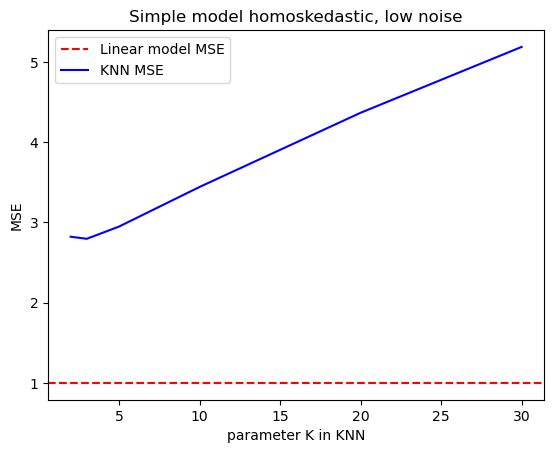

Simple model homoskedastic, high noise
100.6154703064119
{2: 151.3001192514465, 3: 134.83250360018633, 5: 121.52044932101008, 10: 111.92384041408472, 20: 107.88222216767443, 30: 107.1756062704596}


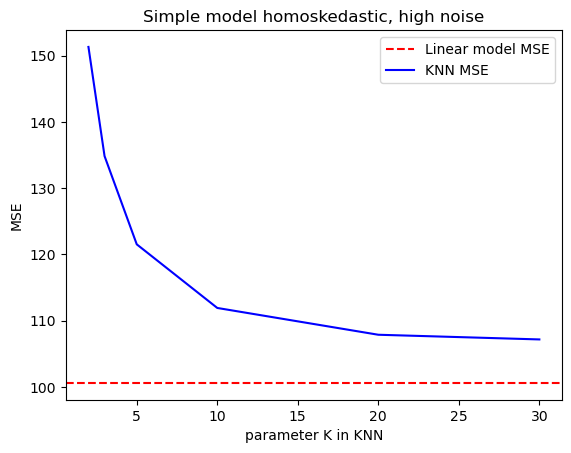

In [ ]:
lms, kms = simulation_simple_model_homoskedasticity_high_r_squared(1000)
summarize('Simple model homoskedastic, low noise', lms, kms)

lms, kms = simulation_simple_model_homoskedasticity_low_r_squared(1000)
summarize('Simple model homoskedastic, high noise', lms, kms)

lms, kms = simulation_simple_model_heteroskedasticity_high_r_squared(1000)
summarize('Simple model heteroskedastic, low noise', lms, kms)

lms, kms = simulation_simple_model_heteroskedasticity_low_r_squared(1000)
summarize('Simple model heteroskedastic, high noise', lms, kms)

lms, kms = simulation_multiple_model_homoskedasticity_high_r_squared(1000)
summarize('Multiple model homoskedastic, low noise', lms, kms)

lms, kms = simulation_multiple_model_heteroskedasticity_low_r_squared(1000)
summarize('Multiple model heteroskedastic, high noise', lms, kms)